# The Small-World Phenomenon

The “small-world phenomenon” -the principle that we are all linked by short chains of acquaintances- was inaugurated as an area of experimental study in the social sciences through the pioneering work of Stanley Milgram in the 1960’s. This work was among the first to make the phenomenon quantitative, allowing people to speak of the “six degrees of separation” between any two people in the United States. Since then, a number of network models have been proposed as frameworks in which to study the problem analytically. One of the most refined of these models was formulated in recent work of Watts and Strogatz.

A social network exhibits the "small-world phenomenon" if, roughly speaking, any two individuals in the network are likely to be connected through a short sequence of intermediate acquaintances.

Milgram’s basic small-world experiment remains one of the most compelling ways to think about the problem. The goal of the experiment was to find short chains of acquaintances linking pairs of people in the United States who did not know one another. In a typical run of the experiment, a source person in Nebraska would be given a letter to deliver to a target person in Massachusetts. The source would initially be told basic information about the target, including his address and occupation; the source would then be instructed to send the letter to someone she knew on a first-name basis in an effort to transmit the letter to the target as efficaciously as possible. Anyone subsequently receiving the letter would be given the same instructions, and the chain of communication would continue until the target was reached. Over many trials, the average number of intermediate steps in a successful chain was found to lie between five and six, a quantity that has since entered popular culture as the “six degrees of separation” principle.


# 1. The Watts-Strogatz model

The Watts–Strogatz model is a random graph generation model that produces graphs with small-world properties, including short average path lengths and high clustering. The underlying lattice structure of the model produces a locally clustered network, and the random links dramatically reduce the average path lengths.

Random networks have low diameter. That is, if every individual in the United States were to have a small number of acquaintances selected uniformly at random from the population — and if acquaintanceship were symmetric — then two random individuals would be linked by a short chain with high probability. Even this early work recognized the limitations of a uniform random model; if A and B are two individuals with a common friend, it is much more likely that they themselves are friends. But at the same time, a network of acquaintanceships that is too “clustered” will not have the low diameter that Milgram’s experiments indicated.

Watts and Strogatz proposed a model for random networks that interpolates between these two extremes, by dividing the edges of the network into “local” and “long-range” contacts [15]. The paradigmatic example they studied was a “re-wired ring lattice,” constructed roughly as follows. One starts with a set V of n points spaced uniformly on a circle, and joins each point by an edge to each of its k nearest neighbors, for a small constant k. These are the “local contacts” in the network. One then introduces a small number of edges in which the endpoints are chosen uniformly at random from V — the “long-range contacts”.

![](Watts-Strogatz-structure.png)

Watts and Strogatz argued that such a model captures two crucial parameters of social networks: there is a simple underlying structure that explains the presence of most edges, but a few edges are produced by a random process that does not respect this structure. Their networks thus have low diameter (like uniform random networks), but also have the property that many of the neighbors of a node u are themselves neighbors (unlike uniform random networks). They showed that a number of naturally arising networks exhibit this pair of properties (including the connections among neurons in the nematode species C. elegans, and the power grid of the Western U.S.); and their approach has been applied to the analysis of the hyperlink graph of the World Wide Web as well.

![](Watts-Strogatz-p.png)

## Exercise

Simulate a Watts-Strogatz model and calculates the clustering coefficient versus the p parameter.




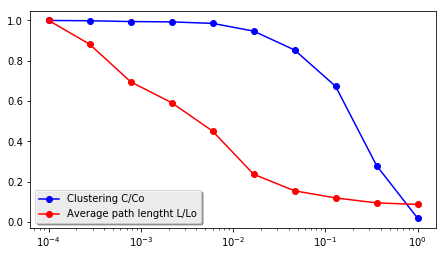

In [93]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
from networkx.generators import connected_watts_strogatz_graph
from networkx.algorithms.shortest_paths.generic import average_shortest_path_length

# Calculate the average shortest path length versus the number of nodes
n = 500
range_p = np.concatenate(([0], np.logspace(-4, 0, num=10)))
results_clus = np.zeros(len(range_p))
results_path = np.zeros(len(range_p))
iterations = 3;
for i in range(iterations):
    for ixp, p in enumerate(range_p):
        # Create a  Watts-Strogatz network
        G = connected_watts_strogatz_graph(n, 6, p, tries=100, seed=None)
        # Calculate the average shortest path of the network
        results_clus[ixp] += nx.average_clustering(G)
        results_path[ixp] += nx.average_shortest_path_length(G)
        
results_clus = results_clus/np.max(results_clus)
results_path = results_path/np.max(results_path)

# Plot figures
plt.figure(figsize=(16, 4), dpi=72)
plt.subplot(1,2,1)
plt.semilogx(range_p, results_clus, 'ob-', label="Clustering C/Co");
plt.semilogx(range_p, results_path, 'or-', label="Average path lengtht L/Lo");
plt.legend(loc='lower left', shadow=True)
plt.show()

# 2. The Kleinberg model

Rather than using a ring as the basic structure of the Watts-Strogatz model, we begin from a two-dimensional grid and allow for edges to be directed. Thus, we begin with a set of nodes (representing individuals in the social network) that are identified with the set of lattice points in an n × n square. We define the lattice distance between two nodes to be the number of “lattice steps” separating them. For a universal constant p ≥ 1, the node u has a directed edge to every other node within lattice distance p (these are its local contacts). For universal constants q ≥ 0 and r ≥ 0, we also construct directed edges from u to q other nodes (the long-range contacts) using independent random trials; the i th directed edge from u has endpoint v with probability proportional to [D(u, v)] −r . (To obtain a probability P distribution, we divide this quantity by the appropriate normalizing constant v [D(u, v)] −r ; we will call this the inverse r^th-power distribution.)

This model has a simple “geographic” interpretation: individuals live on a grid and know their neighbors for some number of steps in all directions; they also have some number of acquaintances distributed more broadly across the grid. Viewing p and q as fixed constants, we obtain a one-parameter family of network models by tuning the value of the exponent r. When r = 0, we have the uniform distribution over long-range contacts, the distribution used in the basic network model of Watts and Strogatz — one’s long-range contacts are chosen independently of their position on the grid. As r increases, the long-range contacts of a node become more and more clustered in its vicinity on the grid. Thus, r serves as a basic structural parameter measuring how widely “networked” the underlying society of nodes is.

The expected delivery time of a decentralized algorithm — a primary figure of merit in our analysis — is the expected number of steps taken by the algorithm to deliver the message over a network generated according to an inverse r^th-power distribution, from a source to a target chosen uniformly at random from the set of nodes.

![](Kleinberg-lattice.png)

When r = 0 (the uniform distribution over long-range contacts) standard results from random graph theory can be used to show that with high probability there exist paths between every pair of nodes whose lengths are bounded by a polynomial in log n, exponentially smaller than the total number of nodes. However, there is no no way for a decentralized algorithm to find these chains.

As the parameter r increases, a decentralized algorithm can take more advantage of the “geographic structure” implicit in the long-range contacts; at the same time, long-range contacts become less useful in moving the message a large distance. There is a value of r where this trade-off can be best exploited algorithmically; this is r = 2, the inverse-square distribution.

![](Kleinberg-r.png)


## Exercise

Simulate a Kleinberg netowork and calculate the average shortest path for different r and number of nodes.

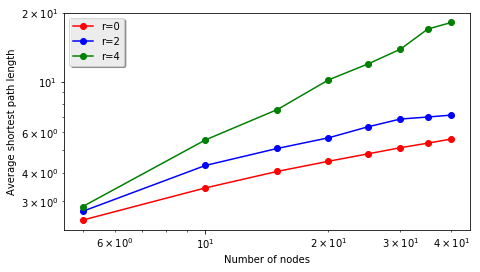

In [9]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from networkx.generators.geometric import navigable_small_world_graph
from networkx.algorithms.shortest_paths.generic import average_shortest_path_length

# Calculate the average shortest path length versus the number of nodes
range_n = range(5, 41, 5)
range_r = [0, 2, 4]
results = np.zeros((len(range_n), len(range_r)))
for ixn, n in enumerate(range_n):
    for ixr, r in enumerate(range_r):
        # Create a Kleinberg network
        G = navigable_small_world_graph(n, p=1, q=1, r=r)
        # Calculate the average shortest path of the network
        results[ixn,ixr] = average_shortest_path_length(G)

# Plot figures
plt.figure(figsize=(16, 4), dpi=72)
plt.subplot(1,2,1)
plt.xlabel("Number of nodes")
plt.ylabel("Average shortest path length")
plt.loglog(range_n, results[:,0], 'or-', label=('r='+str(range_r[0])));
plt.loglog(range_n, results[:,1], 'ob-', label=('r='+str(range_r[1])));
plt.loglog(range_n, results[:,2], 'og-', label=('r='+str(range_r[2])));
plt.legend(loc='upper left', shadow=True)
plt.show()

# References
- Kleinberg, Jon. ["The small-world phenomenon: An algorithmic perspective."](https://ecommons.cornell.edu/bitstream/handle/1813/7430/99-1776.pdf?sequence=1) Proceedings of the thirty-second annual ACM symposium on Theory of computing. ACM, 2000.
- Wikipedia. ["Watts and Strogatz model"](https://en.wikipedia.org/wiki/Watts_and_Strogatz_model)
- Watts, Duncan J., and Steven H. Strogatz. ["Collective dynamics of ‘small-world’networks."](https://pdfs.semanticscholar.org/fdd3/8b9b2800a78e9475bebce83f545eac0ef995.pdf) nature 393.6684 (1998): 440-442.